In [1]:
# import the neccessary libararies 
import pandas as pd
import numpy as np
import pickle               
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler


In [9]:
# pullout the data
#data_link = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
data = 'car_data.xlsx'
# turn the data into a dataframe 
df = pd.read_excel(data)

# heking few rows of the dataset 
df.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [10]:
def wrangle(filepath):
    df = pd.read_excel(filepath)
    mask_qua=low, high = df["MSRP"].quantile([0.1,0.9])
    mask_msrp= df["MSRP"].between(low, high)
    df = df[mask_msrp]
    return df 


    

In [12]:
df = wrangle(data)
df.head

<bound method NDFrame.head of           Make       Model  Year                Engine Fuel Type  Engine HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engine Cylinde

In [13]:
# data cleaning 
df.columns = df.columns.str.lower().str.replace(' ', '_')
df['make'].str.lower().str.replace(' ', '_')
strings = list(df.dtypes[df.dtypes == 'object'].index)
print(strings)


['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']


In [14]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [15]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [16]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [17]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [10]:
#2.3 Exploratory data analysis

In [18]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'fiat' 'chrysler' 'nissan' 'mazda']
37

model
['1_series_m' '1_series' '124_spider' '2_series' '200']
659

year
[2011 2012 2013 2017 2016]
28

engine_fuel_type
['premium_unleaded_(required)' 'premium_unleaded_(recommended)'
 'flex-fuel_(unleaded/e85)' 'regular_unleaded' 'diesel']
10

engine_hp
[335. 300. 230. 320. 160.]
248

engine_cylinders
[ 6.  4.  8.  0. 12.]
7

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'all_wheel_drive' 'front_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[2. 4. 3.]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
55

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' '4dr_hatchback' 'wagon']
16

highway_mpg
[26 28 27 25 35]
52

city_mpg
[19 20 18 17 26]
55

popularity
[3916  819 1013 2009  586]
37

msrp
[46135 40650 36350 29450 34500]
4997



In [19]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [20]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [21]:
# Select columns with 'object' data type
object_columns_df = df.select_dtypes(include=['object']).columns.tolist()
object_columns_df


['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [22]:
categorical = ['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [23]:
# Select columns with float64 and int64 dtypes and get their names
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

print(numeric_columns)

['year', 'engine_hp', 'engine_cylinders', 'number_of_doors', 'highway_mpg', 'city_mpg', 'popularity', 'msrp']


In [24]:
numerical = ['year', 'engine_hp', 
             'engine_cylinders', 
             'number_of_doors', 'highway_mpg', 
             'city_mpg', 'popularity',
               ]

<Axes: xlabel='msrp', ylabel='Count'>

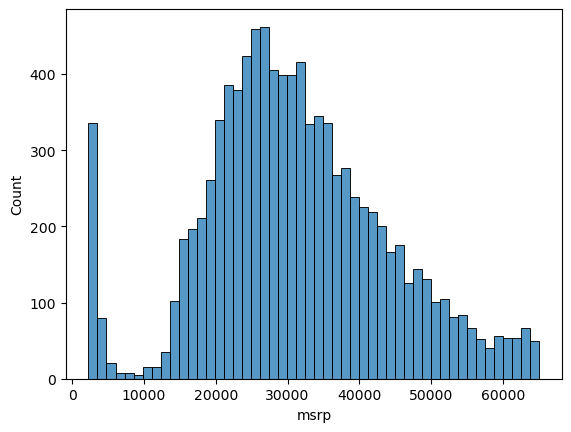

In [25]:
# plot the selected target vaariable 
sns.histplot(df.msrp, bins=50)


In [15]:
# training the model 
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LinearRegression()
    model.fit(X_train, y_train)
    
    return dv, model

In [109]:
# model prediction 
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict(X)

    return y_pred

In [26]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [27]:
# split the dataset into train and test 
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict) 

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)


In [28]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [29]:
y_train = df_train['msrp']
y_val = df_val['msrp']
y_test = df_test['msrp']
# another method
# y_train = np.log1p(df_train.msrp.values)
# y_val = np.log1p(df_val.msrp.values)
# y_test = np.log1p(df_test.msrp.values)

In [ ]:
# del df_train['msrp']
# del df_val['msrp']
# del df_test['msrp']

In [30]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean]*len(y_train)
print("Mean car price:",round(y_mean,2) )
print("Baseline MAE:",mean_absolute_error(y_train,y_pred_baseline ))


Mean car price: 31155.09
Baseline MAE: 9989.831322966409


In [62]:
model = make_pipeline(
    SimpleImputer(),
    StandardScaler(),
    LinearRegression()
    
)
model.fit(X_train,y_train)


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [63]:
# y_pred_training = model.predict(X_train)
# print("Training MAE:",mean_absolute_error(y_train,y_pred_training))
training_mae = mean_absolute_error(y_train,model.predict(X_train))
test_mae =mean_absolute_error(y_test,model.predict(X_test))
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(test_mae, 2))


Training MAE: 2190.47
Test MAE: 1110425705050183.2


In [64]:
import numpy as np
rel_error = test_mae / np.mean(y_test)
print("Relative Error:", rel_error)

Relative Error: 35428165156.808105


In [121]:
y_pred_log =model.predict(X_val)


In [36]:
customer = dicts_test[-1]
customer

{'make': 'gmc',
 'model': 'sierra_1500_classic',
 'engine_fuel_type': 'flex-fuel_(unleaded/e85)',
 'transmission_type': 'automatic',
 'driven_wheels': 'four_wheel_drive',
 'market_category': 'flex_fuel',
 'vehicle_size': 'large',
 'vehicle_style': 'extended_cab_pickup',
 'year': 2007,
 'engine_hp': 295.0,
 'engine_cylinders': 8.0,
 'number_of_doors': 4.0,
 'highway_mpg': 17,
 'city_mpg': 13,
 'popularity': 549}

In [52]:
test_data = {'make': 'toyota',
 'model': 'prius_c',
 'engine_fuel_type': 'regular_unleaded',
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'market_category': 'hatchback,hybrid',
 'vehicle_size': 'compact',
 'vehicle_style': '4dr_hatchback',
 'year': 2030,
 'engine_hp': 97.0,
 'engine_cylinders': 1.0,
 'number_of_doors': 4.0,
 'highway_mpg': 20,
 'city_mpg': 54,
 'popularity': 2046}

In [53]:
X_small = dv.transform([test_data])
model.predict(X_small)


array([32082.09315179])

In [69]:
intercept = model.named_steps["linearregression"].intercept_.round(0)
coefficients = model.named_steps["linearregression"].coef_.round(0)


In [ ]:
print(
    f"price = {intercept} + ({coefficients[0]} * longitude) + ({coefficients[1]} * latitude)"
)


In [73]:
X_train

array([[2.000e+01, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.015e+03],
       [1.400e+01, 0.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        2.009e+03],
       [2.200e+01, 0.000e+00, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        2.016e+03],
       ...,
       [2.100e+01, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.015e+03],
       [1.400e+01, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.005e+03],
       [2.500e+01, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.016e+03]])